In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import vector
import uproot

In [2]:
tree = uproot.open('../data/Run2012B_SingleMu_1000.root')['Events']
muon_charge = tree['Muon_charge'].array()
muon_p4 = vector.Array({"pt": tree['Muon_pt'].array(),
                        "eta": tree['Muon_eta'].array(),
                        "phi": tree['Muon_phi'].array(),
                        "mass": tree['Muon_mass'].array()})
muon_pair_indices = ak.unzip(ak.argcombinations(muon_charge, 2))
dimuon_indices_mask = muon_charge[muon_pair_indices[0]] != muon_charge[muon_pair_indices[1]]
dimuon_mass = (muon_p4[muon_pair_indices[0][dimuon_indices_mask]] + muon_p4[muon_pair_indices[1][dimuon_indices_mask]]).mass
event_mask = ak.sum((60 < dimuon_mass) & (dimuon_mass < 120), axis=1) > 0
met_pt = tree['MET_pt'].array()
result = met_pt[event_mask]

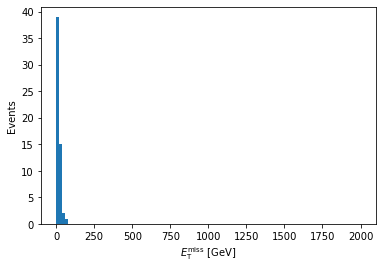

In [3]:
n, bins, _ = plt.hist(result, 100, (0, 2000))
plt.xlabel(r'$E_\mathrm{T}^\mathrm{miss}$ [GeV]')
plt.ylabel('Events')
plt.show()

In [4]:
np.stack((bins[:-1], bins[1:], n), axis=1)

array([[0.00e+00, 2.00e+01, 3.90e+01],
       [2.00e+01, 4.00e+01, 1.50e+01],
       [4.00e+01, 6.00e+01, 2.00e+00],
       [6.00e+01, 8.00e+01, 1.00e+00],
       [8.00e+01, 1.00e+02, 0.00e+00],
       [1.00e+02, 1.20e+02, 0.00e+00],
       [1.20e+02, 1.40e+02, 0.00e+00],
       [1.40e+02, 1.60e+02, 0.00e+00],
       [1.60e+02, 1.80e+02, 0.00e+00],
       [1.80e+02, 2.00e+02, 0.00e+00],
       [2.00e+02, 2.20e+02, 0.00e+00],
       [2.20e+02, 2.40e+02, 0.00e+00],
       [2.40e+02, 2.60e+02, 0.00e+00],
       [2.60e+02, 2.80e+02, 0.00e+00],
       [2.80e+02, 3.00e+02, 0.00e+00],
       [3.00e+02, 3.20e+02, 0.00e+00],
       [3.20e+02, 3.40e+02, 0.00e+00],
       [3.40e+02, 3.60e+02, 0.00e+00],
       [3.60e+02, 3.80e+02, 0.00e+00],
       [3.80e+02, 4.00e+02, 0.00e+00],
       [4.00e+02, 4.20e+02, 0.00e+00],
       [4.20e+02, 4.40e+02, 0.00e+00],
       [4.40e+02, 4.60e+02, 0.00e+00],
       [4.60e+02, 4.80e+02, 0.00e+00],
       [4.80e+02, 5.00e+02, 0.00e+00],
       [5.00e+02, 5.20e+0